# **Pizza Sales Data Analysis**

In [2]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

## ***Data Setup and Cleaning***

In [4]:
# Read first CSV file into DataFrame (order_details_df)
order_details_df = pd.read_csv(r"C:\Users\Ibifu\Documents\TechCrush Tasks\Task 3\Pizza+Place+Sales\pizza_sales\order_details.csv")

# Read second CSV file into DataFrame (orders_df)
orders_df = pd.read_csv(r"C:\Users\Ibifu\Documents\TechCrush Tasks\Task 3\Pizza+Place+Sales\pizza_sales\orders.csv")

# Read third CSV file into DataFrame (pizza_types_df)
# (encode="latin1") interprets the bytes in the file and turns them into text characters.
pizza_types_df = pd.read_csv(r"C:\Users\Ibifu\Documents\TechCrush Tasks\Task 3\Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding="latin1")

# Read fourth CSV file into DataFrame (pizza_df)
pizza_df = pd.read_csv(r"C:\Users\Ibifu\Documents\TechCrush Tasks\Task 3\Pizza+Place+Sales\pizza_sales\pizzas.csv")

### *Preview of first DataFrame (order_details_df)*

In [6]:
# Return the first five rows of the DataFrame
order_details_df.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [7]:
# This line of code returns number of rows and columns present in the dataset
print(f"Orders detail DataFrame contains {order_details_df.shape[0]} rows and {order_details_df.shape[1]} columns")
print("\n")

# Review a quick summary of the dataset
order_details_df.info()

Orders detail DataFrame contains 48620 rows and 4 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
# Check number of null values

order_details_df.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [9]:
# Check count of unique values per column

order_details_df.nunique()

order_details_id    48620
order_id            21350
pizza_id               91
quantity                4
dtype: int64

In [10]:
# Check numeric stats

order_details_df.describe()

,order_details_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622
std,14035.529381,6180.119770,0.143077
min,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000
50%,24310.500000,10682.500000,1.000000
75%,36465.250000,16100.000000,1.000000
max,48620.000000,21350.000000,4.000000


##### The first DataFrame appears to be free of null values, and all columns have the correct data type.


### *Preview of second DataFrame (orders_df)*

In [13]:
# Return the first five rows of the DataFrame

orders_df.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [14]:
# This line of code returns number of rows and columns present in the dataset
print(f"Orders DataFrame contains {orders_df.shape[0]} rows and {orders_df.shape[1]} columns")
print("\n")

# Review a quick summary of the dataset
orders_df.info()

Orders DataFrame contains 21350 rows and 3 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [15]:
# Check number of null values

orders_df.isna().sum()

order_id    0
date        0
time        0
dtype: int64

In [16]:
# Check count of unique values per column

orders_df.nunique()

order_id    21350
date          358
time        16382
dtype: int64

In [17]:
# Check numeric stats

orders_df.describe()

,order_id
count,21350.000000
mean,10675.500000
std,6163.358459
min,1.000000
25%,5338.250000
50%,10675.500000
75%,16012.750000
max,21350.000000


In [18]:
# Convert "date" column to datetime type.

orders_df["date"] = pd.to_datetime(orders_df["date"])

# Confirm data type after conversion, it should be in datetime64 format
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 500.5+ KB


In [19]:
# Convert "time" column to datetime

orders_df["time"] = pd.to_datetime(orders_df["time"], format="%H:%M:%S").dt.time

# Confirm data type after convertion
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 500.5+ KB


##### Pandas time-only columns stays as Python datetime.time object but each row is a datetime.time instance

In [21]:
# Confirm that the first row in the "time" column is actually an instance of "datetime.time"

print(f"Each row in 'time' column is in '{type(orders_df["time"].iloc[0])}' format")

Each row in 'time' column is in '<class 'datetime.time'>' format


##### The second DataFrame appears to be free of null values, and the ‘date’ and ‘time’ columns were converted to the correct data type.


### *Preview of third DataFrame (pizza_types_df)*

In [24]:
# Return the first five rows of the DataFrame

pizza_types_df.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [25]:
# This line of code returns number of rows and columns present in the dataset
print(f"Pizza types DataFrame contains {pizza_types_df.shape[0]} rows and {pizza_types_df.shape[1]} columns")
print("\n") # This code instructs the program to move to a new line.

# Review a quick summary of the dataset
pizza_types_df.info()

Pizza types DataFrame contains 32 rows and 4 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [26]:
# Check number of null values

pizza_types_df.isna().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [27]:
# Check count of unique values per column

pizza_types_df.nunique()

pizza_type_id    32
name             32
category          4
ingredients      32
dtype: int64

##### The third DataFrame appears to be free of null values, and all columns have the correct data type.

### *Preview of fourth DataFrame (pizza_df)*

In [30]:
# Return the first five rows of the DataFrame

pizza_df.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [31]:
# This line of code returns number of rows and columns present in the dataset
print(f"Pizza DataFrame contains {pizza_df.shape[0]} rows and {pizza_df.shape[1]} columns")
print("\n") # This code instructs the program to move to a new line.

# Review a quick summary of the dataset
pizza_df.info()

Pizza DataFrame contains 96 rows and 4 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [32]:
# Check number of null values

pizza_df.isna().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

In [33]:
# Check count of unique values per column

pizza_df.nunique()

pizza_id         96
pizza_type_id    32
size              5
price            27
dtype: int64

In [34]:
# Check numeric stats

pizza_df.describe()

,price
count,96.000000
mean,16.440625
std,4.090266
min,9.750000
25%,12.500000
50%,16.250000
75%,20.250000
max,35.950000


##### The fourth DataFrame appears to be free of null values, and all columns have the correct data type.

## ***Building Master DataFrame***

##### Joining DataFrames: Order Details - Pizzas - Pizza Types - Orders

**The Relationships**

* ***Orders - Order Details:*** Every order detail must have a matching order and every order with pizzas must have details.

* ***Order Details - Pizzas:*** Each item must refer to a valid pizza on the menu.

* ***Pizzas - Pizza Types:*** Each pizza must belong to a valid pizza type.

**Why Inner Joins Fits**

***Analysis Goal***: Analyse actual sales of pizza. If an order detail doesn’t have a matching pizza, it isn’t a valid sale.

An inner join automatically drops any orphan rows (e.g., an order_id in Order Details that isn’t in Orders)

**Recommended Sequence**

* Order Details INNER JOIN Pizzas on pizza_id

* Result INNER JOIN Pizza Types on pizza_type_id

* Result INNER JOIN Orders on order_id

That produces a sales-only master table where every row represents a valid sold pizza with full context.

In [38]:
# Join DataFrames "order_details_df" and "pizza_df" based on a common column(key) "pizza_id" and store in "first_join"

first_join = pd.merge(order_details_df, pizza_df, how="inner", on="pizza_id")

# Return first five rows 
first_join.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00


In [39]:
# Join DataFrames "first_join" and "pizza_types_df" based on a common column(key) "pizza_type_id" and store in "second_join"

second_join = pd.merge(first_join, pizza_types_df, how="inner", on="pizza_type_id")

# Return first five rows 
second_join.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [40]:
# Join DataFrames "second_join" and "orders_df" based on a common column(key) "order_id" and store in "df"

# "df" will be the master DataFrame

df = pd.merge(second_join, orders_df, how="inner", on="order_id")

# Return first five rows 
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40


In [41]:
# This line of code returns number of rows and columns present in the dataset
print(f"Master DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns")
print("\n") # This code instructs the program to move to a new line.

#  Review a quick summary of the dataset
df.info()

Master DataFrame contains 48620 rows and 12 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   pizza_type_id     48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   name              48620 non-null  object        
 8   category          48620 non-null  object        
 9   ingredients       48620 non-null  object        
 10  date              48620 non-null  datetime64[ns]
 11  time              48620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.5+ MB


In [42]:
# Check number of null values

df.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
date                0
time                0
dtype: int64

In [43]:
# Check numeric stats

df.describe()

,order_details_id,order_id,quantity,price,date
count,48620.000000,48620.000000,48620.000000,48620.000000,48620
mean,24310.500000,10701.479761,1.019622,16.494132,2015-06-29 11:03:43.611682560
min,1.000000,1.000000,1.000000,9.750000,2015-01-01 00:00:00
25%,12155.750000,5337.000000,1.000000,12.750000,2015-03-31 00:00:00
50%,24310.500000,10682.500000,1.000000,16.500000,2015-06-28 00:00:00
75%,36465.250000,16100.000000,1.000000,20.250000,2015-09-28 00:00:00
max,48620.000000,21350.000000,4.000000,35.950000,2015-12-31 00:00:00
std,14035.529381,6180.119770,0.143077,3.621789,NaN


## ***Data Analysis***

### *1. Total revenue/sales*

In [46]:
# Calculate revenue for each row using "price" and "quantity" columns and sum up the result of the series to get the total revenue

total_revenue = (df["price"] * df["quantity"]).sum()

print(f"Total Revenue: {total_revenue:,.2f}")

Total Revenue: 817,860.05


### *2. Total quantity sold*

In [48]:
# Calculate total quantity by summing up "quantity" column across all rows

total_quantity_sold = df["quantity"].sum()

print(f"Total Quantity Sold: {total_quantity_sold:,.0f}")

Total Quantity Sold: 49,574


### *3. Total number of orders*

In [50]:
# Find total orders by counting unique values of the column "order_id"

total_orders = df["order_id"].nunique()

print(f"Total Number of Orders: {total_orders:,.0f}")

Total Number of Orders: 21,350


### *4. Total Number of pizza types*

In [52]:
# Find total count of pizza types by counting unique values of the column "pizza_type_id"

total_pizza_types = df["pizza_type_id"].nunique()

print(f"Total Number of Pizza Types: {total_pizza_types}")

Total Number of Pizza Types: 32


### *5. Average price of the pizzas*

In [54]:
# Calculate average price of pizzas using mean() method

average_price = df["price"].mean()

print(f"Average Price of Pizzas: {average_price:.2f}")

Average Price of Pizzas: 16.49


### *6. Peak hours of sales*

In [56]:
# This line of code extracts hour from the existing "datetime.time" object which has hour attribute and then applies it to the rows in "time" column
# then saves the records in a new column "hour"

df["hour"] = df["time"].apply(lambda t: t.hour)

# Find peak hours of sales by grouping "hour" column and calculate sum of quantities sold per hour and then sort values in descending
# order and return the first 5 records

peak_hours = df.groupby("hour")["quantity"].sum().sort_values(ascending=False).reset_index()

# Display output
print("Hourly Sales:")
peak_hours

Hourly Sales:


,hour,quantity
0,12,6776
1,13,6413
2,18,5417
3,17,5211
4,19,4406
5,16,4239
6,14,3613
7,20,3534
8,15,3216
9,11,2728


##### Lunch hour 12 - 13(12–1 pm) and early dinner hour 17 - 19(5–7 pm) are busiest.

### *7. Total sales by day of week & best day*

In [59]:
# This line of code extracts days of the week from "datetime" using the method "day_name()"
# then saves the days of the week in a new column "day_of_week"

df["day_of_week"] = df["date"].dt.day_name()

# Find total sales of each day in week by grouping "day_of_week" column and calculate sum of quantities sold per day and then sort values in 
# descending order

sales_by_day = df.groupby("day_of_week")["quantity"].sum().sort_values(ascending=False).reset_index()

# Display output
print("Total Sales By Day of Week:")
sales_by_day

Total Sales By Day of Week:


,day_of_week,quantity
0,Friday,8242
1,Saturday,7493
2,Thursday,7478
3,Wednesday,6946
4,Tuesday,6895
5,Monday,6485
6,Sunday,6035


##### Friday is the top-selling day with about 8.2k quantities sold 

### *8. Top 5 best-selling pizzas*

In [62]:
# Find 5 best selling pizzas by grouping "name" column and calculate sum of quantities sold per pizza type and then sort values
# in descending order and return the first five records

top5 = df.groupby("name")["quantity"].sum().sort_values(ascending=False).reset_index().head()

# Display output
print("Top 5 best-selling pizzas:")
top5

Top 5 best-selling pizzas:


,name,quantity
0,The Classic Deluxe Pizza,2453
1,The Barbecue Chicken Pizza,2432
2,The Hawaiian Pizza,2422
3,The Pepperoni Pizza,2418
4,The Thai Chicken Pizza,2371


Based on total quantity sold, the **five best-selling pizzas** are: **Classic Deluxe**, **Barbecue Chicken**, **Hawaiian**, **Pepperoni**,
**Thai Chicken**. These pizzas account for a significant share of total revenue and should remain the core focus for promotions, inventory planning, and combo deals.

### *9. Monthly Sales Trend*

In [65]:
# This line of code extracts month names from "datetime" using the method "month_name()"
# then saves the records in a new column "month"

df["month"] = df["date"].dt.month_name()

# Find the sales made in each month by grouping "month" column and calculate the sum of quantities sold per month

sales_by_month = df.groupby("month")["quantity"].sum().sort_values(ascending=False).reset_index()

# Display output
print("Monthly Sales:")
sales_by_month

Monthly Sales:


,month,quantity
0,July,4392
1,May,4328
2,November,4266
3,March,4261
4,January,4232
5,August,4168
6,April,4151
7,June,4107
8,February,3961
9,December,3935


##### The month with the highest sales is 'July' and the month with the lowest sales is 'October'

### *10. Low-selling pizzas*

In [68]:
# Find 5 least selling pizzas by grouping "name" column and calculate sum of quantities sold per pizza type and then sort values
# in ascending order and return the first five records

low_sellers = df.groupby("name")["quantity"].sum().sort_values().reset_index().head()

# Display Output
print("Low-selling pizzas are:")
low_sellers

Low-selling pizzas are:


,name,quantity
0,The Brie Carre Pizza,490
1,The Mediterranean Pizza,934
2,The Calabrese Pizza,937
3,The Spinach Supreme Pizza,950
4,The Soppressata Pizza,961


##### The data shows a handful of pizzas with **consistently low sales volumes**

### *11. Sales by pizza size*

In [71]:
# Find high selling quantity based on pizza size by grouping "size" column and calculate sum of quantities sold per size 

sales_by_size = df.groupby("size")["quantity"].sum().sort_values(ascending=False).reset_index()

# Display Output
print("Sales by Size:")
sales_by_size

Sales by Size:


,size,quantity
0,L,18956
1,M,15635
2,S,14403
3,XL,552
4,XXL,28


##### The highest selling size of pizzas are L, M, and S while others have low quantity of sales."

In [73]:
# Review of final dataframe after creating necessary columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   pizza_type_id     48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   name              48620 non-null  object        
 8   category          48620 non-null  object        
 9   ingredients       48620 non-null  object        
 10  date              48620 non-null  datetime64[ns]
 11  time              48620 non-null  object        
 12  hour              48620 non-null  int64         
 13  day_of_week       48620 non-null  object        
 14  month             4862

In [74]:
# Return first five records of the DataFrame

df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,hour,day_of_week,month
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,11,Thursday,January
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,11,Thursday,January
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,11,Thursday,January
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,11,Thursday,January
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,11,Thursday,January


In [75]:
# Save cleaned master DataFrame as "pizza_sales.csv"

df.to_csv(r"C:\Users\Ibifu\Documents\TechCrush Tasks\Task 3\Pizza+Place+Sales\pizza_sales\pizza_sales.csv", index=False)

## ***Exploratory Data Analysis (EDA)***

### *1. Hourly Sales*

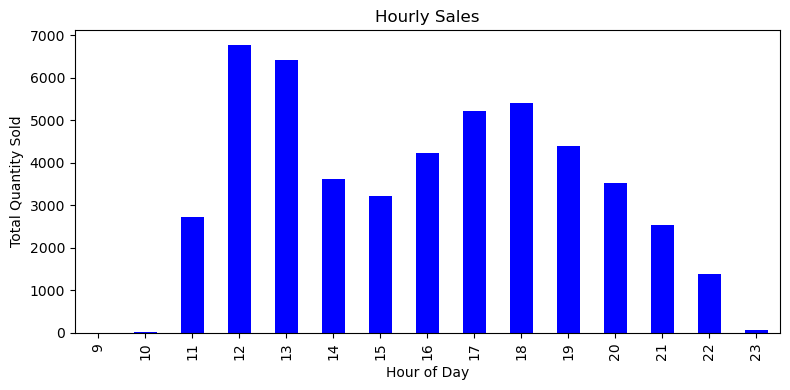

In [78]:
# Key metric for hourly sales plot. Group "hour" and calculate sum of quantities sold per hour
hourly_sales = df.groupby("hour")["quantity"].sum() 

# Specify height and width of plot
plt.figure(figsize=(8,4))

# Plot bar chart for hourly sales
hourly_sales.plot(kind="bar", color="blue")

# Set title and labels 
plt.title("Hourly Sales")
plt.xlabel("Hour of Day")
plt.ylabel("Total Quantity Sold")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Displays the plot
plt.show()

##### From the above visual, the busiest hours are during lunch hour 12 - 13(12pm - 1pm) and early evening hour 17 - 19(5 - 7pm)

### *2. Sales by Day of the Week*

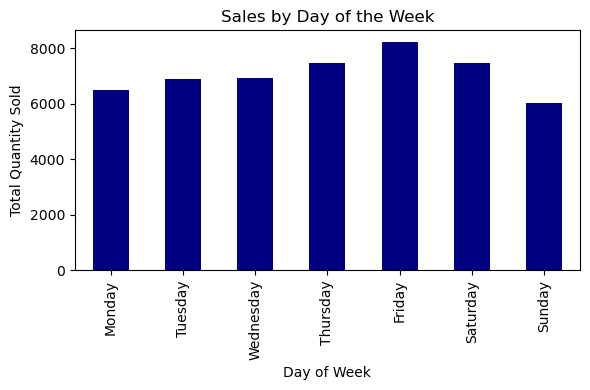

In [81]:
# Key metric for sales by day of the week plot. Group "day_of_week" and calculate sum of quantities sold per day
sales_by_day = df.groupby("day_of_week")["quantity"].sum()

# reindex() the days of the week to appear in the normal Monday–Sunday order and store in a new variable
sales_by_day = sales_by_day.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Specify height and width of plot
plt.figure(figsize=(6,4))

# Plot bar chart for sales by day of the week. 
sales_by_day.plot(kind="bar", color="navy")

# Set title and labels 
plt.title("Sales by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Quantity Sold")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Displays the plot
plt.show()

##### Fridays consistently produce the highest daily totals.

### *3. Monthly Sales Trend*

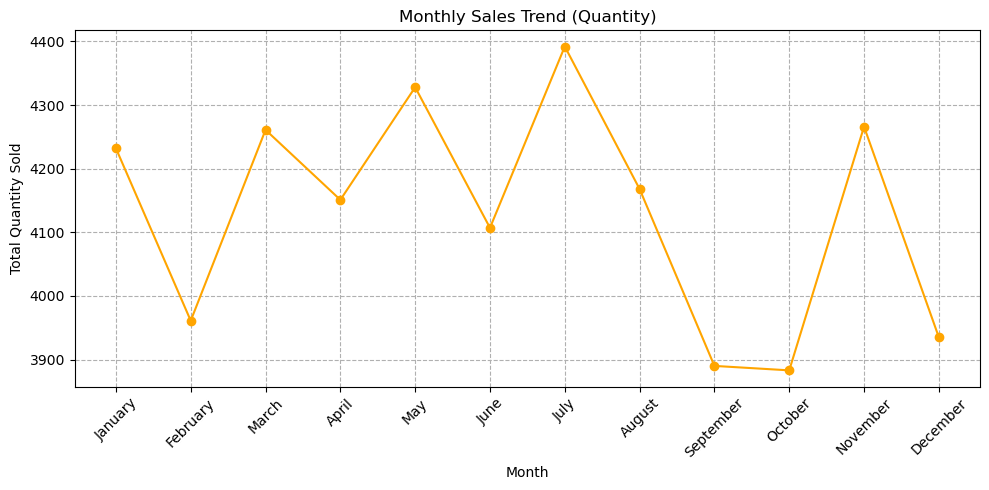

In [84]:
# Key metric for monthly sales. Group by "month" and calculate sum of quantities sold per month
sales_by_month = df.groupby("month")["quantity"].sum()

# reindex() the names of months to appear in the normal January–December order and store in a new variable
sales_by_month = sales_by_month.reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

# Specify height and width of plot
plt.figure(figsize=(10,5))

# Plot line graph for monthly sales.
sales_by_month.plot(kind="line", color="orange", marker="o")

# xticks() guarantees that all month names are shown on the line graph since line graphs sometimes truncate cramped index.
plt.xticks(ticks=range(len(sales_by_month)),  # one tick for each point
           labels=sales_by_month.index,      # use the month names
           rotation=45)                      # angle for readability

# Set title, labels and grid
plt.title("Monthly Sales Trend (Quantity)")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.grid(True, linestyle="--")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout() 

# Displays the plot
plt.show()

##### Overall sales hover between 3,900–4,400 pizzas per month.

### *4. Sales by Pizza Size*

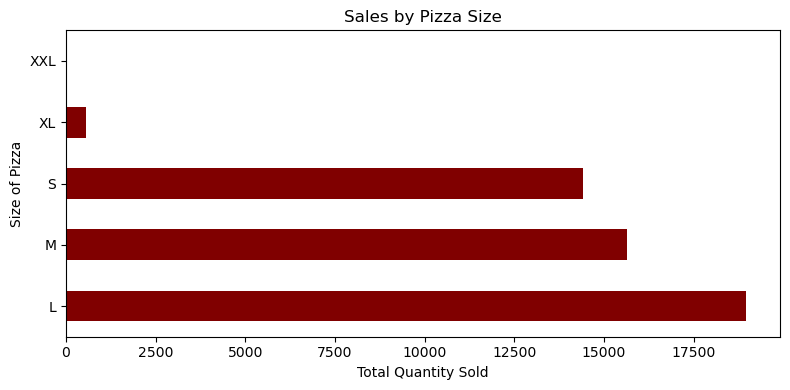

In [87]:
# Key metric for pizza size sales. Group by "size" and calculate sum of quantities sold per size
sales_by_size = df.groupby("size")["quantity"].sum()

# Specify height and width of plot
plt.figure(figsize=(8,4))

# Plot bar chart for sales of pizza size. Notice the kind is "barh" the "h" signifies an horizontal bar chart
sales_by_size.plot(kind="barh", color="maroon")

# Set title and labels
plt.title("Sales by Pizza Size")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Size of Pizza")

# Automatically adjusts the spacing of labels, and tick marks so nothing gets cut off or overlaps.
plt.tight_layout()

# Displays the plot
plt.show()

##### Overall, the business relies heavily on L and M sizes, while XL and XXL contribute very little and might need special promotions or a menu rethink.

## ***Summary***

*The pizza shop generated approximately 818k in 2015, selling nearly 50k pizzas across 21k orders.*

*Fridays at lunchtime are the prime window, and Classic Deluxe, BBQ Chicken, Hawaiian, Pepperoni, and Thai Chicken are the stars. Consider promoting or rethinking low performers like Brie Carre or Mediterranean and customers prefer to order Large(L) or Medium(M) size pizzas.*